# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [245]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [246]:
# check the number of rows and observations
df.shape

(614, 13)

<Axes: xlabel='Loan_Approved', ylabel='count'>

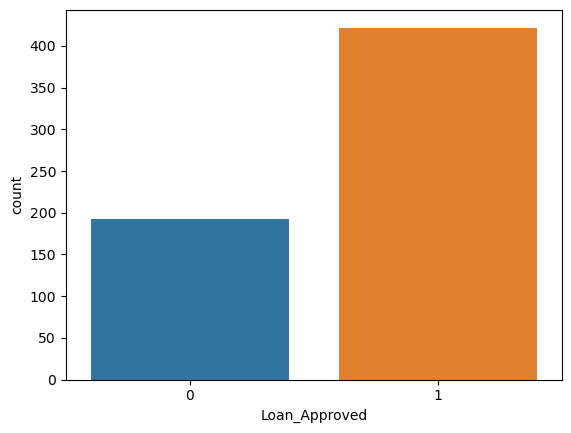

In [247]:
# How many application were approved and how many were denied? Plot a bar plot
approvals = df['Loan_Approved'].value_counts()
approvals
sns.barplot(x = approvals.index, y = approvals)

### Data Prep

In [248]:
# drop 'Loan_ID' variable from the data. We won't need it.
df.drop(columns=['Loan_ID'], inplace=True, errors='ignore')
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Approved          int64
dtype: object

In [249]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
df = pd.get_dummies(df)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128,360,1,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128,360,1,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66,360,1,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120,360,1,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141,360,1,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71,360,1,1,True,False,True,False,...,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40,180,1,1,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253,360,1,1,False,True,False,True,...,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187,360,1,1,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    int64  
 3   Loan_Amount_Term         614 non-null    int64  
 4   Credit_History           614 non-null    int64  
 5   Loan_Approved            614 non-null    int64  
 6   Gender_Female            614 non-null    bool   
 7   Gender_Male              614 non-null    bool   
 8   Married_No               614 non-null    bool   
 9   Married_Yes              614 non-null    bool   
 10  Dependents_0             614 non-null    bool   
 11  Dependents_1             614 non-null    bool   
 12  Dependents_2             614 non-null    bool   
 13  Dependents_3+            614 non-null    bool   
 14  Education_Graduate       6

In [251]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [252]:
# Seperate the input features and target variable
x = df[[col for col in df.columns if col is not 'Loan_Approved']]
y = df['Loan_Approved']

In [253]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

# , random_state=1234 is perfect
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

In [254]:
# check the split if interested
xtrain

pd.crosstab(df['Credit_History'], df['Loan_Approved'])

Loan_Approved,0,1
Credit_History,,
0,82,7
1,110,415


# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [255]:
import sklearn
sklearn.__version__

'1.2.2'

In [256]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [257]:
# Fit the model on the data
model = LogisticRegression().fit(xtrain,ytrain)

In [258]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.
test_prediction = model.predict(xtest)
print(ytest.shape)
acc = accuracy_score(ytest, test_prediction)
acc

(123,)


0.991869918699187

In [259]:
# Print the confusion matrix
confusion_matrix(ytest, test_prediction)

array([[40,  1],
       [ 0, 82]])

In [260]:
# check how probabilities are assigned
pypred = model.predict_proba(xtest)
pypred

# For each row, probability of YES and probability of NO

array([[0.91871082, 0.08128918],
       [0.00235012, 0.99764988],
       [0.97777101, 0.02222899],
       [0.99385256, 0.00614744],
       [0.94826881, 0.05173119],
       [0.0075601 , 0.9924399 ],
       [0.02827243, 0.97172757],
       [0.01806186, 0.98193814],
       [0.9316262 , 0.0683738 ],
       [0.0250424 , 0.9749576 ],
       [0.01303378, 0.98696622],
       [0.05261544, 0.94738456],
       [0.98894931, 0.01105069],
       [0.03693048, 0.96306952],
       [0.94579656, 0.05420344],
       [0.02170031, 0.97829969],
       [0.98371025, 0.01628975],
       [0.02260887, 0.97739113],
       [0.01182162, 0.98817838],
       [0.7744544 , 0.2255456 ],
       [0.93440615, 0.06559385],
       [0.02509221, 0.97490779],
       [0.04249723, 0.95750277],
       [0.02973888, 0.97026112],
       [0.06345108, 0.93654892],
       [0.95498418, 0.04501582],
       [0.0092466 , 0.9907534 ],
       [0.05653822, 0.94346178],
       [0.94673821, 0.05326179],
       [0.86002991, 0.13997009],
       [0.

In [261]:
# to change the default threshold and to make it 70% and above
strict_pred = (pypred[:, 1] >= 0.7).astype(int)
confusion_matrix(ytest, strict_pred)



array([[41,  0],
       [ 0, 82]])

## <font color='chocolate'>**2. Random Forest**

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [263]:
# Let's list the tunable hyperparameters for Random Forest algorithm
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_features='auto', 
    min_samples_leaf=10
).fit(xtrain, ytrain)


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [264]:
# Fit a Random Forest Classifier

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(ytest, ypred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        82

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123

